In [ ]:
#pip install numpy
#pip install seaborn
#pip install panda
#pip install matplotlib
#pip install scikit-learn
#pip install plotly

In [1]:
# Importing the libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from __future__  import print_function #adds compatibility with new versions of Python
%matplotlib inline 
#it needs to have two underscore for 'future', if not it thorws an error: 
#ModuleNotFoundError: No module named '_future_'

import warnings
warnings.filterwarnings("ignore") #This command ignores the warning 


In [2]:
#Importing the dataset #1

#The dataset chosen for this project is listings for Airbnb 

listing = pd.read_csv('listings.csv')


In [3]:
#Importing the dataset #2

#The dataset chosen for this project is reviews for Airbnb 

review = pd.read_csv('reviews.csv')


In [22]:
#Importing the dataset # 3

#The dataset chosen for this project is calendar for Airbnb

calendar = pd.read_csv('calendar.csv')


In [8]:
#Importing the dataset # 4

#The dataset chosen for this project is the Dublin listings from OpenData 

airbnb_listing = pd.read_csv('airbnb-listings.csv', sep=";")


In [5]:
#Importing the dataset # 5

#The dataset chosen for this project is Dublin listings from OpenData 

airbnb_listing1 = pd.read_csv('airbnb-opendata.csv')

In [9]:
#Importing the dataset # 6

#The dataset chosen for this project is Dublin rate from Airbtics 
rate = pd.read_csv('rate.csv')

#this dataset is a sample, however it contains a lot of information. I needed to fix it as it didn't have the columns set right.


EDA to be done using and merging the first 5 datasets, needs to be cleaned, wrangled and adjsuted accordingly. 

Some of the datasets are for trends and whether or not features influence reviews that influence occupancy that generates higher ROI. 
the dataset for ML is the last one, it is a sample data of Dublin, I want to identify the occupancy rate in the future. 

In [10]:
rate.head()

,THIS IS A SAMPLE DATASET. PLEASE SUBSCRIBE TO YOUR MARKET TO GAIN FULL ACCESS TO ITS DATA!,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Listing URL,Property Type,Latitude,Longitude,Star Rating,Number of Active Days,Bedrooms,Has pool,Cleaning Fee,Extra Guest Fee,...,Revenue (2021-01),Revenue (2021-02),Revenue (2021-03),Revenue (2021-04),Revenue (2021-05),Revenue (2021-06),Revenue (2021-07),Revenue (2021-08),Revenue (2021-09),Revenue (2021-10)
2,http://airbnb.com/rooms/47311,entire_home,50.81523,-0.10806,4.3,274,1,f,37,0,...,62,1069,1588,2076,2636,3237,3206,0,0,0
3,http://airbnb.com/rooms/74819,Entire Home,50.82145,-0.14257,4.9,243,3,f,52,0,...,7078,0,0,15587,0,0,15521,15622,13314,11036
4,http://airbnb.com/rooms/76190,entire_home,50.82369,-0.15587,4.5,365,3,f,63,5.04667,...,5920,833,2495,5881,7672,9570,9927,10492,6317,2113


In [11]:
#Based on the information on the dataset itself, I added these columns names. 
rate.columns = [
    "Listing URL",
    "Property Type",
    "Latitude",
    "Longitude",
    "Star Rating",
    "Number of Active Days",
    "Bedrooms",
    "Has pool",
    "Cleaning Fee",
    "Extra Guest Fee",
    "Daily Rate (2020-11)",
    "Daily Rate (2020-12)",
    "Daily Rate (2021-01)",
    "Daily Rate (2021-02)",
    "Daily Rate (2021-03)",
    "Daily Rate (2021-04)",
    "Daily Rate (2021-05)",
    "Daily Rate (2021-06)",
    "Daily Rate (2021-07)",
    "Daily Rate (2021-08)",
    "Daily Rate (2021-09)",
    "Daily Rate (2021-10)",
    "Occupancy Rate (2020-11)",
    "Occupancy Rate (2020-12)",
    "Occupancy Rate (2021-01)",
    "Occupancy Rate (2021-02)",
    "Occupancy Rate (2021-03)",
    "Occupancy Rate (2021-04)",
    "Occupancy Rate (2021-05)",
    "Occupancy Rate (2021-06)",
    "Occupancy Rate (2021-07)",
    "Occupancy Rate (2021-08)",
    "Occupancy Rate (2021-09)",
    "Occupancy Rate (2021-10)",
    "Revenue (2020-11)",
    "Revenue (2020-12)",
    "Revenue (2021-01)",
    "Revenue (2021-02)",
    "Revenue (2021-03)",
    "Revenue (2021-04)",
    "Revenue (2021-05)",
    "Revenue (2021-06)",
    "Revenue (2021-07)",
    "Revenue (2021-08)",
    "Revenue (2021-09)",
    "Revenue (2021-10)",
]


In [12]:
rate.head()

,Listing URL,Property Type,Latitude,Longitude,Star Rating,Number of Active Days,Bedrooms,Has pool,Cleaning Fee,Extra Guest Fee,...,Revenue (2021-01),Revenue (2021-02),Revenue (2021-03),Revenue (2021-04),Revenue (2021-05),Revenue (2021-06),Revenue (2021-07),Revenue (2021-08),Revenue (2021-09),Revenue (2021-10)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Listing URL,Property Type,Latitude,Longitude,Star Rating,Number of Active Days,Bedrooms,Has pool,Cleaning Fee,Extra Guest Fee,...,Revenue (2021-01),Revenue (2021-02),Revenue (2021-03),Revenue (2021-04),Revenue (2021-05),Revenue (2021-06),Revenue (2021-07),Revenue (2021-08),Revenue (2021-09),Revenue (2021-10)
2,http://airbnb.com/rooms/47311,entire_home,50.81523,-0.10806,4.3,274,1,f,37,0,...,62,1069,1588,2076,2636,3237,3206,0,0,0
3,http://airbnb.com/rooms/74819,Entire Home,50.82145,-0.14257,4.9,243,3,f,52,0,...,7078,0,0,15587,0,0,15521,15622,13314,11036
4,http://airbnb.com/rooms/76190,entire_home,50.82369,-0.15587,4.5,365,3,f,63,5.04667,...,5920,833,2495,5881,7672,9570,9927,10492,6317,2113


In [13]:
#dropping the two first rows.
rate.drop(index=rate.index[0:2], 
        axis=0, 
        inplace=True)

In [14]:
rate.head()

,Listing URL,Property Type,Latitude,Longitude,Star Rating,Number of Active Days,Bedrooms,Has pool,Cleaning Fee,Extra Guest Fee,...,Revenue (2021-01),Revenue (2021-02),Revenue (2021-03),Revenue (2021-04),Revenue (2021-05),Revenue (2021-06),Revenue (2021-07),Revenue (2021-08),Revenue (2021-09),Revenue (2021-10)
2,http://airbnb.com/rooms/47311,entire_home,50.81523,-0.10806,4.3,274,1,f,37,0,...,62,1069,1588,2076,2636,3237,3206,0,0,0
3,http://airbnb.com/rooms/74819,Entire Home,50.82145,-0.14257,4.9,243,3,f,52,0,...,7078,0,0,15587,0,0,15521,15622,13314,11036
4,http://airbnb.com/rooms/76190,entire_home,50.82369,-0.15587,4.5,365,3,f,63,5.04667,...,5920,833,2495,5881,7672,9570,9927,10492,6317,2113
5,http://airbnb.com/rooms/98654,entire_home,50.82094,-0.12963,4.5,365,2,f,80,4.94667,...,2283,2283,2283,2283,2283,2283,2283,2283,2283,2283
6,http://airbnb.com/rooms/146850,condo,50.82178,-0.12914,4.8,274,1,f,0,0,...,819,0,0,1067,960,0,1067,1046,974,1005


In [15]:
rate.isnull().sum()

Listing URL                  0
Property Type                0
Latitude                     0
Longitude                    0
Star Rating                  0
Number of Active Days        0
Bedrooms                     0
Has pool                     0
Cleaning Fee                23
Extra Guest Fee             23
Daily Rate (2020-11)         0
Daily Rate (2020-12)         0
Daily Rate (2021-01)         0
Daily Rate (2021-02)         0
Daily Rate (2021-03)         0
Daily Rate (2021-04)         0
Daily Rate (2021-05)         0
Daily Rate (2021-06)         0
Daily Rate (2021-07)         0
Daily Rate (2021-08)         0
Daily Rate (2021-09)         0
Daily Rate (2021-10)         0
Occupancy Rate (2020-11)     0
Occupancy Rate (2020-12)     0
Occupancy Rate (2021-01)     0
Occupancy Rate (2021-02)     0
Occupancy Rate (2021-03)     0
Occupancy Rate (2021-04)     0
Occupancy Rate (2021-05)     0
Occupancy Rate (2021-06)     0
Occupancy Rate (2021-07)     0
Occupancy Rate (2021-08)     0
Occupanc

In [16]:
#replacing all NaN values with 0
rate.fillna({'Cleaning Fee':0}, inplace=True)
rate.fillna({'Extra Guest Fee':0}, inplace=True)

In [17]:
rate.isnull().sum()

Listing URL                 0
Property Type               0
Latitude                    0
Longitude                   0
Star Rating                 0
Number of Active Days       0
Bedrooms                    0
Has pool                    0
Cleaning Fee                0
Extra Guest Fee             0
Daily Rate (2020-11)        0
Daily Rate (2020-12)        0
Daily Rate (2021-01)        0
Daily Rate (2021-02)        0
Daily Rate (2021-03)        0
Daily Rate (2021-04)        0
Daily Rate (2021-05)        0
Daily Rate (2021-06)        0
Daily Rate (2021-07)        0
Daily Rate (2021-08)        0
Daily Rate (2021-09)        0
Daily Rate (2021-10)        0
Occupancy Rate (2020-11)    0
Occupancy Rate (2020-12)    0
Occupancy Rate (2021-01)    0
Occupancy Rate (2021-02)    0
Occupancy Rate (2021-03)    0
Occupancy Rate (2021-04)    0
Occupancy Rate (2021-05)    0
Occupancy Rate (2021-06)    0
Occupancy Rate (2021-07)    0
Occupancy Rate (2021-08)    0
Occupancy Rate (2021-09)    0
Occupancy 

In [18]:
#examine the dataset
(rate[['Star Rating', 'Number of Active Days', 'Daily Rate (2020-12)', 'Occupancy Rate (2020-12)',
       'Revenue (2020-12)']]
 .describe())

,Star Rating,Number of Active Days,Daily Rate (2020-12),Occupancy Rate (2020-12),Revenue (2020-12)
count,3026,3026,3026,3026,3026
unique,26,13,512,102,1468
top,5,365,-1,-1,-1
freq,853,2126,371,600,603


In [19]:
#need to be encoded to integer

rate.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3026 entries, 2 to 3027
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Listing URL               3026 non-null   object
 1   Property Type             3026 non-null   object
 2   Latitude                  3026 non-null   object
 3   Longitude                 3026 non-null   object
 4   Star Rating               3026 non-null   object
 5   Number of Active Days     3026 non-null   object
 6   Bedrooms                  3026 non-null   object
 7   Has pool                  3026 non-null   object
 8   Cleaning Fee              3026 non-null   object
 9   Extra Guest Fee           3026 non-null   object
 10  Daily Rate (2020-11)      3026 non-null   object
 11  Daily Rate (2020-12)      3026 non-null   object
 12  Daily Rate (2021-01)      3026 non-null   object
 13  Daily Rate (2021-02)      3026 non-null   object
 14  Daily Rate (2021-03)    

In [20]:
#separating the dataset into categorical and numeric

#later to change the object type to float64

categorical_col = ['Listing URL','Property Type', 'Has pool']

numeric_col = ['Latitude', 
               'Longitude', 
               'Star Rating', 
               'Number of Active Days', 
               'Bedrooms', 
               'Cleaning Fee', 
               'Extra Guest Fee',            
               'Daily Rate (2020-11)',         
               'Daily Rate (2020-12)',
               'Daily Rate (2021-01)',
               'Daily Rate (2021-02)',        
               'Daily Rate (2021-03)',       
                'Daily Rate (2021-04)',        
                'Daily Rate (2021-05)',        
                'Daily Rate (2021-06)',        
                'Daily Rate (2021-07)',        
                'Daily Rate (2021-08)',        
                'Daily Rate (2021-09)',        
                'Daily Rate (2021-10)',        
                'Occupancy Rate (2020-11)',    
                'Occupancy Rate (2020-12)',   
                'Occupancy Rate (2021-01)',    
                'Occupancy Rate (2021-02)',    
                'Occupancy Rate (2021-03)',    
                'Occupancy Rate (2021-04)',    
                'Occupancy Rate (2021-05)',    
                'Occupancy Rate (2021-06)',    
                'Occupancy Rate (2021-07)',    
                'Occupancy Rate (2021-08)',    
                'Occupancy Rate (2021-09)',    
                'Occupancy Rate (2021-10)',   
                'Revenue (2020-11)',           
                'Revenue (2020-12)',         
                'Revenue (2021-01)',           
                'Revenue (2021-02)',           
                'Revenue (2021-03)',           
                'Revenue (2021-04)',           
                'Revenue (2021-05)',           
                'Revenue (2021-06)',           
                'Revenue (2021-07)',           
                'Revenue (2021-08)',           
                'Revenue (2021-09)',           
                'Revenue (2021-10)',
              ]


In [21]:
print(numeric_col)

['Latitude', 'Longitude', 'Star Rating', 'Number of Active Days', 'Bedrooms', 'Cleaning Fee', 'Extra Guest Fee', 'Daily Rate (2020-11)', 'Daily Rate (2020-12)', 'Daily Rate (2021-01)', 'Daily Rate (2021-02)', 'Daily Rate (2021-03)', 'Daily Rate (2021-04)', 'Daily Rate (2021-05)', 'Daily Rate (2021-06)', 'Daily Rate (2021-07)', 'Daily Rate (2021-08)', 'Daily Rate (2021-09)', 'Daily Rate (2021-10)', 'Occupancy Rate (2020-11)', 'Occupancy Rate (2020-12)', 'Occupancy Rate (2021-01)', 'Occupancy Rate (2021-02)', 'Occupancy Rate (2021-03)', 'Occupancy Rate (2021-04)', 'Occupancy Rate (2021-05)', 'Occupancy Rate (2021-06)', 'Occupancy Rate (2021-07)', 'Occupancy Rate (2021-08)', 'Occupancy Rate (2021-09)', 'Occupancy Rate (2021-10)', 'Revenue (2020-11)', 'Revenue (2020-12)', 'Revenue (2021-01)', 'Revenue (2021-02)', 'Revenue (2021-03)', 'Revenue (2021-04)', 'Revenue (2021-05)', 'Revenue (2021-06)', 'Revenue (2021-07)', 'Revenue (2021-08)', 'Revenue (2021-09)', 'Revenue (2021-10)']


In [22]:
rate[numeric_col] = rate[numeric_col].apply(pd.to_numeric, errors='coerce')

In [23]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3026 entries, 2 to 3027
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Listing URL               3026 non-null   object 
 1   Property Type             3026 non-null   object 
 2   Latitude                  3026 non-null   float64
 3   Longitude                 3026 non-null   float64
 4   Star Rating               3026 non-null   float64
 5   Number of Active Days     3026 non-null   int64  
 6   Bedrooms                  2868 non-null   float64
 7   Has pool                  3026 non-null   object 
 8   Cleaning Fee              3026 non-null   int64  
 9   Extra Guest Fee           3026 non-null   float64
 10  Daily Rate (2020-11)      3026 non-null   int64  
 11  Daily Rate (2020-12)      3026 non-null   int64  
 12  Daily Rate (2021-01)      3026 non-null   int64  
 13  Daily Rate (2021-02)      3026 non-null   int64  
 14  Daily Ra

In [24]:
#NOT NEEDED - things I tried.
#encoding the dataset so that I can add columns for the rates values. 
#rate['Cleaning Fee'] = rate['Cleaning Fee'].astype(float)

In [25]:
rate.drop(columns=['Listing URL', 'Property Type', 'Latitude', 'Longitude', 'Has pool'])

,Star Rating,Number of Active Days,Bedrooms,Cleaning Fee,Extra Guest Fee,Daily Rate (2020-11),Daily Rate (2020-12),Daily Rate (2021-01),Daily Rate (2021-02),Daily Rate (2021-03),...,Revenue (2021-01),Revenue (2021-02),Revenue (2021-03),Revenue (2021-04),Revenue (2021-05),Revenue (2021-06),Revenue (2021-07),Revenue (2021-08),Revenue (2021-09),Revenue (2021-10)
2,4.3,274,1.0,37,0.00000,88,88,90,91,92,...,62,1069,1588,2076,2636,3237,3206,0,0,0
3,4.9,243,3.0,52,0.00000,283,270,238,280,404,...,7078,0,0,15587,0,0,15521,15622,13314,11036
4,4.5,365,3.0,63,5.04667,201,249,222,207,143,...,5920,833,2495,5881,7672,9570,9927,10492,6317,2113
5,4.5,365,2.0,80,4.94667,182,221,194,194,194,...,2283,2283,2283,2283,2283,2283,2283,2283,2283,2283
6,4.8,274,1.0,0,0.00000,33,33,34,34,35,...,819,0,0,1067,960,0,1067,1046,974,1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,0.0,365,2.0,69,5.52667,180,180,180,180,180,...,123,123,123,1991,4053,6782,7778,7882,3650,2927
3024,0.0,365,1.0,80,0.00000,82,82,82,82,82,...,1716,1716,1716,2845,4519,5453,6471,5192,3434,2907
3025,5.0,365,1.0,55,0.00000,39,39,39,39,39,...,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235
3026,0.0,365,1.0,80,0.00000,59,59,59,59,59,...,1273,1273,1273,2448,4594,5642,6663,6016,6181,2848


In [26]:
#mean all the Revenue, Occupancy and Daily Rate

rate['daily_rate_mean'] = rate[['Daily Rate (2021-01)','Daily Rate (2021-02)', 'Daily Rate (2021-03)','Daily Rate (2021-04)', 'Daily Rate (2021-05)','Daily Rate (2021-06)', 'Daily Rate (2021-07)','Daily Rate (2021-08)', 'Daily Rate (2021-09)','Daily Rate (2021-10)', 'Daily Rate (2020-11)','Daily Rate (2020-12)']].mean(axis=1)

rate['revenue_mean'] = rate[['Revenue (2020-11)','Revenue (2020-12)','Revenue (2021-01)','Revenue (2021-02)','Revenue (2021-03)','Revenue (2021-04)',          'Revenue (2021-05)','Revenue (2021-06)','Revenue (2021-07)','Revenue (2021-08)','Revenue (2021-09)','Revenue (2021-10)']].mean(axis=1)

rate['occupancy_mean'] = rate[['Occupancy Rate (2020-11)','Occupancy Rate (2020-12)','Occupancy Rate (2021-01)','Occupancy Rate (2021-02)','Occupancy Rate (2021-03)','Occupancy Rate (2021-04)','Occupancy Rate (2021-05)','Occupancy Rate (2021-06)','Occupancy Rate (2021-07)','Occupancy Rate (2021-08)','Occupancy Rate (2021-09)','Occupancy Rate (2021-10)']].mean(axis=1)


In [27]:
rate.head()

,Listing URL,Property Type,Latitude,Longitude,Star Rating,Number of Active Days,Bedrooms,Has pool,Cleaning Fee,Extra Guest Fee,...,Revenue (2021-04),Revenue (2021-05),Revenue (2021-06),Revenue (2021-07),Revenue (2021-08),Revenue (2021-09),Revenue (2021-10),daily_rate_mean,revenue_mean,occupancy_mean
2,http://airbnb.com/rooms/47311,entire_home,50.81523,-0.10806,4.3,274,1.0,f,37,0.00000,...,2076,2636,3237,3206,0,0,0,90.833333,1166.333333,36.583333
3,http://airbnb.com/rooms/74819,Entire Home,50.82145,-0.14257,4.9,243,3.0,f,52,0.00000,...,15587,0,0,15521,15622,13314,11036,399.916667,7871.000000,63.000000
4,http://airbnb.com/rooms/76190,entire_home,50.82369,-0.15587,4.5,365,3.0,f,63,5.04667,...,5881,7672,9570,9927,10492,6317,2113,251.833333,6100.583333,70.666667
5,http://airbnb.com/rooms/98654,entire_home,50.82094,-0.12963,4.5,365,2.0,f,80,4.94667,...,2283,2283,2283,2283,2283,2283,2283,195.250000,2296.000000,34.000000
6,http://airbnb.com/rooms/146850,condo,50.82178,-0.12914,4.8,274,1.0,f,0,0.00000,...,1067,960,0,1067,1046,974,1005,34.333333,710.666667,68.000000


In [28]:
rate = rate.drop(['Daily Rate (2021-01)','Daily Rate (2021-02)', 'Daily Rate (2021-03)','Daily Rate (2021-04)', 'Daily Rate (2021-05)','Daily Rate (2021-06)', 'Daily Rate (2021-07)','Daily Rate (2021-08)', 'Daily Rate (2021-09)','Daily Rate (2021-10)', 'Daily Rate (2020-11)','Daily Rate (2020-12)','Revenue (2020-11)','Revenue (2020-12)','Revenue (2021-01)','Revenue (2021-02)','Revenue (2021-03)','Revenue (2021-04)','Revenue (2021-05)','Revenue (2021-06)','Revenue (2021-07)','Revenue (2021-08)','Revenue (2021-09)','Revenue (2021-10)','Occupancy Rate (2020-11)','Occupancy Rate (2020-12)','Occupancy Rate (2021-01)','Occupancy Rate (2021-02)','Occupancy Rate (2021-03)','Occupancy Rate (2021-04)','Occupancy Rate (2021-05)','Occupancy Rate (2021-06)','Occupancy Rate (2021-07)','Occupancy Rate (2021-08)','Occupancy Rate (2021-09)','Occupancy Rate (2021-10)'], axis=1)

In [29]:
#del rate['Daily Rate (2021-01)','Daily Rate (2021-02)', 'Daily Rate (2021-03)','Daily Rate (2021-04)', 'Daily Rate (2021-05)','Daily Rate (2021-06)', 'Daily Rate (2021-07)','Daily Rate (2021-08)', 'Daily Rate (2021-09)','Daily Rate (2021-10)', 'Daily Rate (2020-11)','Daily Rate (2020-12)','Revenue (2020-11)','Revenue (2020-12)','Revenue (2021-01)','Revenue (2021-02)','Revenue (2021-03)','Revenue (2021-04)',          'Revenue (2021-05)','Revenue (2021-06)','Revenue (2021-07)','Revenue (2021-08)','Revenue (2021-09)','Revenue (2021-10)','Occupancy Rate (2020-11)','Occupancy Rate (2020-12)','Occupancy Rate (2021-01)','Occupancy Rate (2021-02)','Occupancy Rate (2021-03)','Occupancy Rate (2021-04)','Occupancy Rate (2021-05)','Occupancy Rate (2021-06)','Occupancy Rate (2021-07)','Occupancy Rate (2021-08)','Occupancy Rate (2021-09)','Occupancy Rate (2021-10)']

In [30]:
rate.head()

,Listing URL,Property Type,Latitude,Longitude,Star Rating,Number of Active Days,Bedrooms,Has pool,Cleaning Fee,Extra Guest Fee,daily_rate_mean,revenue_mean,occupancy_mean
2,http://airbnb.com/rooms/47311,entire_home,50.81523,-0.10806,4.3,274,1.0,f,37,0.00000,90.833333,1166.333333,36.583333
3,http://airbnb.com/rooms/74819,Entire Home,50.82145,-0.14257,4.9,243,3.0,f,52,0.00000,399.916667,7871.000000,63.000000
4,http://airbnb.com/rooms/76190,entire_home,50.82369,-0.15587,4.5,365,3.0,f,63,5.04667,251.833333,6100.583333,70.666667
5,http://airbnb.com/rooms/98654,entire_home,50.82094,-0.12963,4.5,365,2.0,f,80,4.94667,195.250000,2296.000000,34.000000
6,http://airbnb.com/rooms/146850,condo,50.82178,-0.12914,4.8,274,1.0,f,0,0.00000,34.333333,710.666667,68.000000


In [31]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3026 entries, 2 to 3027
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Listing URL            3026 non-null   object 
 1   Property Type          3026 non-null   object 
 2   Latitude               3026 non-null   float64
 3   Longitude              3026 non-null   float64
 4   Star Rating            3026 non-null   float64
 5   Number of Active Days  3026 non-null   int64  
 6   Bedrooms               2868 non-null   float64
 7   Has pool               3026 non-null   object 
 8   Cleaning Fee           3026 non-null   int64  
 9   Extra Guest Fee        3026 non-null   float64
 10  daily_rate_mean        3026 non-null   float64
 11  revenue_mean           3026 non-null   float64
 12  occupancy_mean         3026 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 331.0+ KB


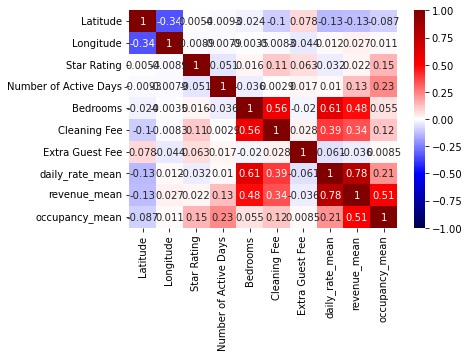

In [32]:
#correlations - example 

rate.corr() # Whole correlation matrix
rate.corr()['revenue_mean'] # Check correlations with outcome only
sns.heatmap(rate.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

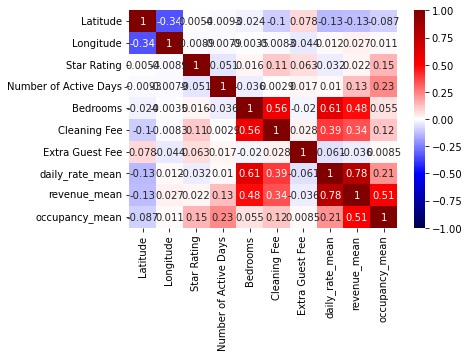

In [33]:
#correlations - example 

rate.corr() # Whole correlation matrix
rate.corr()['daily_rate_mean'] # Check correlations with outcome only
sns.heatmap(rate.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

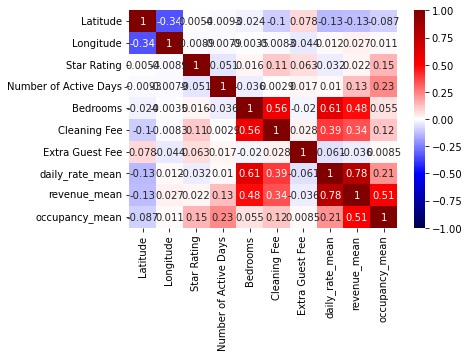

In [34]:
#correlations - example 

rate.corr() # Whole correlation matrix
rate.corr()['occupancy_mean'] # Check correlations with outcome only
sns.heatmap(rate.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [35]:
# Import packages
import pandas as pd
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import lars_path
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score
import scipy.stats as stats
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Skewness: 4.078485
Kurtosis: 26.157308


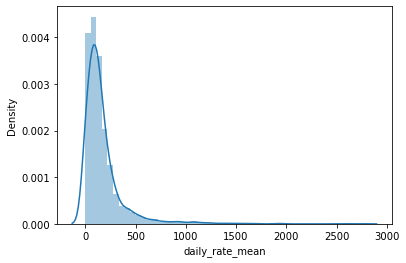

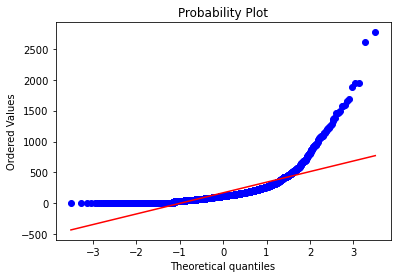

In [37]:
sns.distplot(rate['daily_rate_mean'], kde=True,);
fig = plt.figure()
res = stats.probplot(rate['daily_rate_mean'], plot=plt)
print("Skewness: %f" % rate['daily_rate_mean'].skew())
print("Kurtosis: %f" % rate['daily_rate_mean'].kurt())

#Need to review this as the dataset looks skewed 

In [38]:
rate.head()

,Listing URL,Property Type,Latitude,Longitude,Star Rating,Number of Active Days,Bedrooms,Has pool,Cleaning Fee,Extra Guest Fee,daily_rate_mean,revenue_mean,occupancy_mean
2,http://airbnb.com/rooms/47311,entire_home,50.81523,-0.10806,4.3,274,1.0,f,37,0.00000,90.833333,1166.333333,36.583333
3,http://airbnb.com/rooms/74819,Entire Home,50.82145,-0.14257,4.9,243,3.0,f,52,0.00000,399.916667,7871.000000,63.000000
4,http://airbnb.com/rooms/76190,entire_home,50.82369,-0.15587,4.5,365,3.0,f,63,5.04667,251.833333,6100.583333,70.666667
5,http://airbnb.com/rooms/98654,entire_home,50.82094,-0.12963,4.5,365,2.0,f,80,4.94667,195.250000,2296.000000,34.000000
6,http://airbnb.com/rooms/146850,condo,50.82178,-0.12914,4.8,274,1.0,f,0,0.00000,34.333333,710.666667,68.000000


In [40]:
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44077,203703,2011-03-20,393348,Christian,We enjoyed our stay very much. The room was co...
1,44077,211369,2011-03-28,444004,Solidea,We have been here 4 nights. Stay in a home is ...
2,44077,234215,2011-04-21,465058,Michael And Isabelle,Teresa and Hughie were great hosts. They were ...
3,44077,261843,2011-05-13,490005,Weston,"No surprises, was as described. Very gracious..."
4,44077,268148,2011-05-17,520460,Barbara,"Teresa was a lovely hostess, and we had a deli..."


# Listing dataset 

In [3]:
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,65,3,227,6 03 2020,1.74,3,233,0,NaN
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.29885,-6.31850,Private room,30,1,1,11 05 2019,0.03,1,99,0,NaN
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,61,3,182,9 03 2020,1.42,3,323,0,NaN
3,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,40,2,316,5 12 2021,2.67,3,324,5,NaN
4,162809,5.5 miles south of Dublin City :^),777681,Robert,NaN,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room,65,1,288,19 10 2021,3.62,2,114,4,NaN


In [4]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6977 entries, 0 to 6976
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6977 non-null   int64  
 1   name                            6976 non-null   object 
 2   host_id                         6977 non-null   int64  
 3   host_name                       6968 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6977 non-null   object 
 6   latitude                        6977 non-null   float64
 7   longitude                       6977 non-null   float64
 8   room_type                       6977 non-null   object 
 9   price                           6977 non-null   int64  
 10  minimum_nights                  6977 non-null   int64  
 11  number_of_reviews               6977 non-null   int64  
 12  last_review                     55

In [5]:
# Drop the data that are not of interest and/or causing privacy issues
listing.drop(['id','host_name','last_review'], axis=1, inplace=True)
# Visualize the first 5 rows
listing.head(100)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,cosy comfortable Irish cottage twin,193005,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,65,3,227,1.74,3,233,0,NaN
1,Habitación en Dublín Double room,466111,NaN,South Dublin,53.29885,-6.31850,Private room,30,1,1,0.03,1,99,0,NaN
2,Cosy Comfortable Irish Cottage 1 Double Bed,193005,NaN,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,61,3,182,1.42,3,323,0,NaN
3,Friendly Single Room,766611,NaN,Dublin City,53.39027,-6.23547,Private room,40,2,316,2.67,3,324,5,NaN
4,5.5 miles south of Dublin City :^),777681,NaN,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room,65,1,288,3.62,2,114,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Boutique Chic 2, 10min Temple Bar! Fab location.",192210,NaN,Dublin City,53.36581,-6.32408,Entire home/apt,600,14,188,1.94,3,53,0,NaN
96,2 single cosy rooms in Ranelagh,6782586,NaN,Dublin City,53.32338,-6.25333,Private room,50,3,269,2.83,2,240,11,NaN
97,"City Centre Apartment, sleeps 2",10583714,NaN,Dublin City,53.34665,-6.26371,Entire home/apt,95,14,64,0.91,1,0,0,NaN
98,Ensuite luxury - Dublin city center,5670240,NaN,Dublin City,53.34932,-6.26709,Private room,80,2,48,0.58,1,9,0,NaN


In [6]:
listing.isnull().sum()

name                                 1
host_id                              0
neighbourhood_group               6977
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 1450
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           6977
dtype: int64

In [7]:
listing.fillna({'reviews_per_month':0}, inplace=True)

In [8]:
(listing[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]
 .describe())

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.977000e+03,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000
mean,3.019986e+02,8.927189,30.272753,0.762961,7.251971,65.408772
std,1.405164e+04,42.118071,59.819724,1.883356,25.062374,114.209065
min,9.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.500000e+01,1.000000,1.000000,0.020000,1.000000,0.000000
50%,8.500000e+01,2.000000,6.000000,0.210000,1.000000,0.000000
75%,1.480000e+02,4.000000,29.000000,0.900000,3.000000,78.000000
max,1.173721e+06,1125.000000,648.000000,81.060000,162.000000,365.000000


In [9]:
listing = listing.loc[listing['price'] > 0]

In [10]:
listing.describe()

,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.977000e+03,0.0,6977.000000,6977.000000,6.977000e+03,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,0.0
mean,1.023079e+08,NaN,53.345333,-6.255625,3.019986e+02,8.927189,30.272753,0.762961,7.251971,65.408772,2.958005,NaN
std,1.005189e+08,NaN,0.044036,0.057919,1.405164e+04,42.118071,59.819724,1.883356,25.062374,114.209065,11.218871,NaN
min,4.398400e+04,NaN,53.205780,-6.488790,9.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,2.441876e+07,NaN,53.330220,-6.278780,5.500000e+01,1.000000,1.000000,0.020000,1.000000,0.000000,0.000000,NaN
50%,6.504127e+07,NaN,53.343990,-6.260634,8.500000e+01,2.000000,6.000000,0.210000,1.000000,0.000000,0.000000,NaN
75%,1.534091e+08,NaN,53.356460,-6.235200,1.480000e+02,4.000000,29.000000,0.900000,3.000000,78.000000,1.000000,NaN
max,4.349262e+08,NaN,53.623490,-6.052910,1.173721e+06,1125.000000,648.000000,81.060000,162.000000,365.000000,366.000000,NaN


In [11]:
# Recode data as categorical
# https://datascience.stackexchange.com/questions/29093/continuous-variable-to-categorical-by-quartiles
listing_encoded = listing.copy()
listing_encoded['minimum_nights'] = pd.qcut(listing['minimum_nights'], q=2, labels=["minimum_nights_low", "minimum_nights_high"])
listing_encoded['number_of_reviews'] = pd.qcut(listing['number_of_reviews'], q=3, labels=["number_of_reviews_low", "minimum_nights_medium", "number_of_reviews_high"])
listing_encoded['reviews_per_month'] = pd.qcut(listing['reviews_per_month'], q=2, labels=["reviews_per_month_low", "reviews_per_month_high"])
listing_encoded['calculated_host_listings_count'] = pd.cut(listing['calculated_host_listings_count'], 
                                                bins=[0, 2, 327],
                                                labels=["calculated_host_listings_count_low", "calculated_host_listings_count_high"])

#NEEDS TO BE FIXED
#listing_encoded['availability_365'] = pd.qcut(listing['availability_365'], q=2, labels=["availability_low", "availability_high"])





In [12]:
listing_encoded.isnull().sum()

name                                 1
host_id                              0
neighbourhood_group               6977
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           6977
dtype: int64

In [26]:
#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in listing.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [27]:
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [28]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(1, 0, 'city'),
 Text(2, 0, 'room'),
 Text(3, 0, 'dublin'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'double'),
 Text(6, 0, 'bedroom'),
 Text(7, 0, 'centre'),
 Text(8, 0, 'the'),
 Text(9, 0, 'to'),
 Text(10, 0, 'bed'),
 Text(11, 0, '-'),
 Text(12, 0, 'home'),
 Text(13, 0, 'house'),
 Text(14, 0, 'with'),
 Text(15, 0, '2'),
 Text(16, 0, 'private'),
 Text(17, 0, 'modern'),
 Text(18, 0, 'cosy'),
 Text(19, 0, 'of'),
 Text(20, 0, 'near'),
 Text(21, 0, 'and'),
 Text(22, 0, '1'),
 Text(23, 0, 'spacious'),
 Text(24, 0, 'close')]

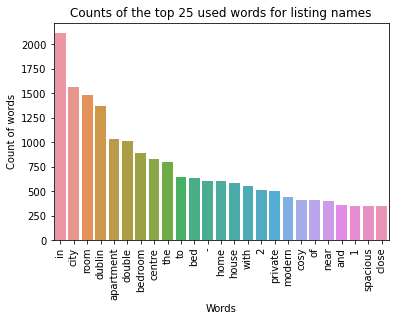

In [44]:
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=90)

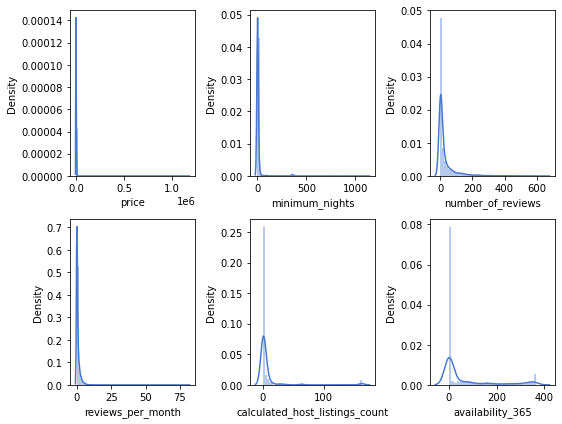

In [30]:
sns.set_palette("muted")
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.distplot(listing['price'])

subplot(2,3,2)
sns.distplot(listing['minimum_nights'])

subplot(2,3,3)
sns.distplot(listing['number_of_reviews'])

subplot(2,3,4)
sns.distplot(listing['reviews_per_month'])

subplot(2,3,5)
sns.distplot(listing['calculated_host_listings_count'])

subplot(2,3,6)
sns.distplot(listing['availability_365'])

plt.tight_layout() # avoid overlap of plotsplt.draw()

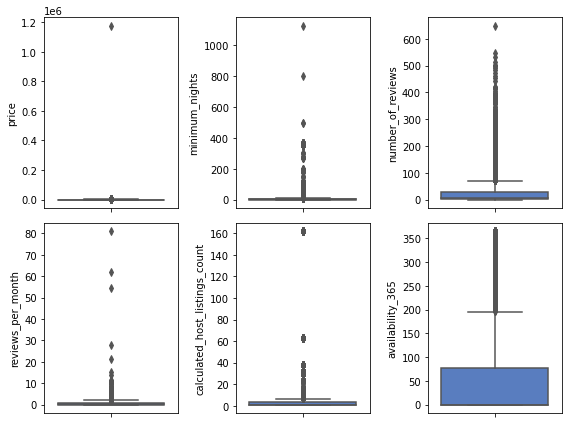

In [31]:
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.boxplot(y = listing['price']) 

subplot(2,3,2)
sns.boxplot(y = listing['minimum_nights'])

subplot(2,3,3)
sns.boxplot(y = listing['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y = listing['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y = listing['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(y = listing['availability_365'])

plt.tight_layout() # avoid overlap of plots
plt.draw()

In [15]:
# Set up color blind friendly color palette
# The palette with grey:
cbPalette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
# The palette with black:
cbbPalette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# sns.palplot(sns.color_palette(cbPalette))
# sns.palplot(sns.color_palette(cbbPalette))

sns.set_palette(cbPalette)
#sns.set_palette(cbbPalette)

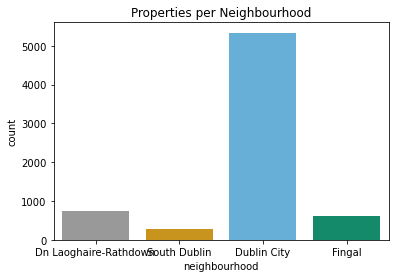

In [16]:
title = 'Properties per Neighbourhood'
sns.countplot(listing['neighbourhood'])
plt.title(title)
plt.ioff()

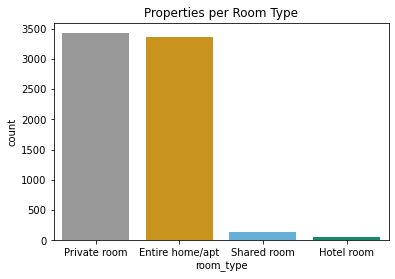

In [17]:
title = 'Properties per Room Type'
sns.countplot(listing['room_type'])
plt.title(title)
plt.ioff()

In [18]:
listing.drop(['neighbourhood_group'], axis=1, inplace=True)

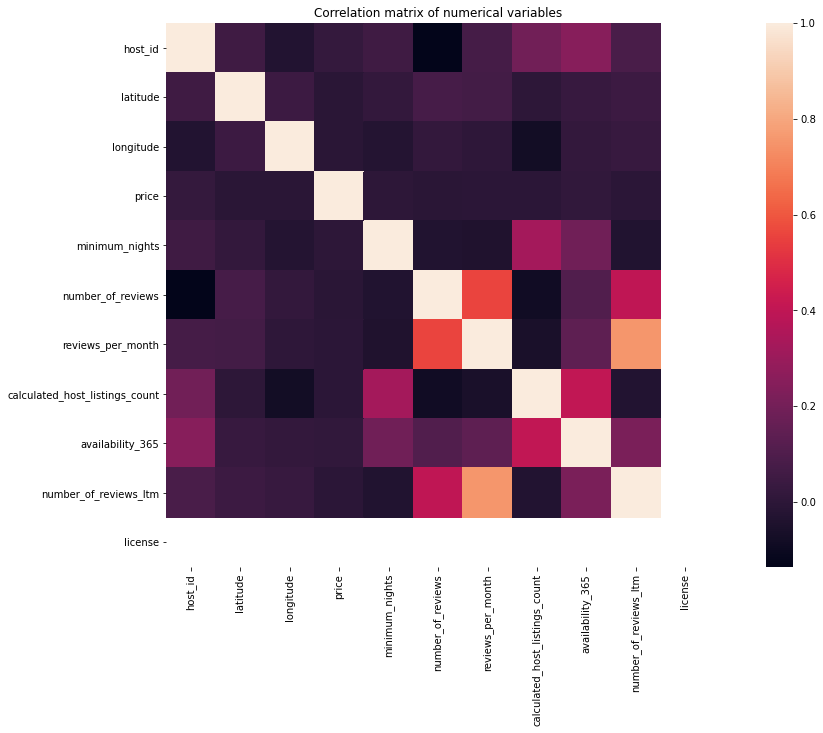

In [24]:
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(listing.corr(), square=True)
plt.title(title)
plt.ioff()


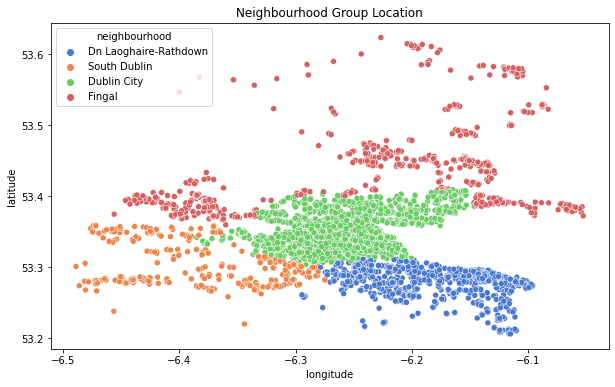

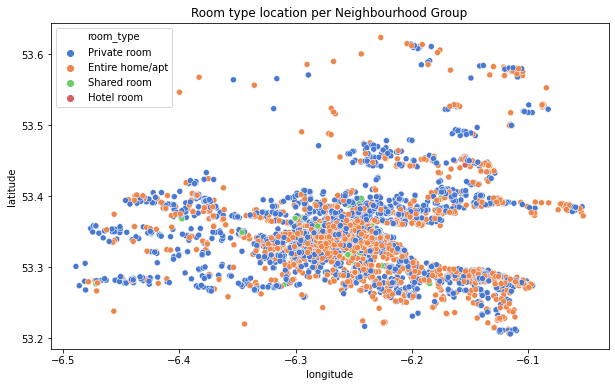

In [33]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(listing.longitude,listing.latitude,hue=listing.neighbourhood).set_title(title)
plt.ioff()

title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(listing.longitude,listing.latitude,hue=listing.room_type).set_title(title)
plt.ioff()

In [34]:
sub_1=listing.loc[listing['neighbourhood'] == 'Dn Laoghaire-Tathdown']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=listing.loc[listing['neighbourhood'] == 'South Dublin']
price_sub2=sub_2[['price']]
#Queens
sub_3=listing.loc[listing['neighbourhood'] == 'Dublin City']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=listing.loc[listing['neighbourhood'] == 'Fingal']
price_sub4=sub_4[['price']]

#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4]

In [35]:
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Dn Laoghaire-Tathdown', 'South Dublin', 'Dublin City', 'Fingal']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)

#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Dn Laoghaire-Tathdown,South Dublin,Dublin City,Fingal
Stats,,,,
min,NaN,12.0,9.00,15.0
25%,NaN,40.0,56.25,48.0
50%,NaN,55.0,90.00,72.5
75%,NaN,95.0,150.00,120.0
max,NaN,2286.0,1173721.00,4000.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood')

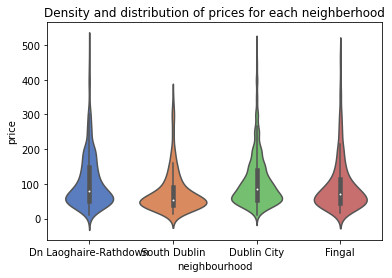

In [36]:
#creating a sub-dataframe with no extreme values / less than 500
sub_6=listing[listing.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood')

In [37]:
listing.neighbourhood.value_counts().head(10)

Dublin City              5334
Dn Laoghaire-Rathdown     742
Fingal                    616
South Dublin              285
Name: neighbourhood, dtype: int64

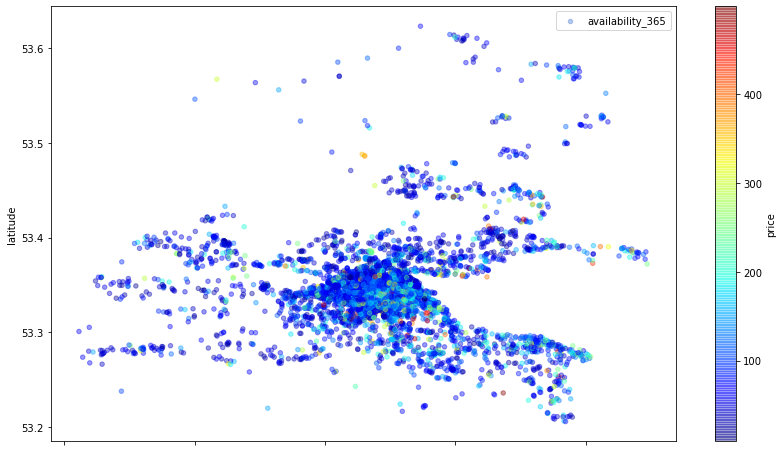

In [39]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(14,8))
viz_4.legend()

In [20]:
# Load the Dataset  
#data.drop(['latitude', 'name',], axis=1, inplace=True)
listing.drop(['name'], axis=1, inplace=True)
listing_copy = listing.copy()

In [155]:
# log10 transform
# https://stackoverflow.com/questions/30794525/adding-one-to-all-the-values-in-a-dataframe
# data_copy = data.copy()
listing.minimum_nights += 0.000000001
listing['minimum_nights'] = np.log10(listing['minimum_nights'])
listing.number_of_reviews += 0.000000001
listing['number_of_reviews'] = np.log10(listing['number_of_reviews'])
listing.reviews_per_month += 0.000000001
listing['reviews_per_month'] = np.log10(listing['reviews_per_month'])
listing.calculated_host_listings_count += 0.000000001
listing['calculated_host_listings_count'] = np.log10(listing['calculated_host_listings_count'])
listing.availability_365 += 0.000000001
listing['availability_365'] = np.log10(listing['availability_365'])

In [156]:
# Encoding categorical data
listing = pd.get_dummies(listing, columns=['room_type'], drop_first=True)
listing = pd.get_dummies(listing, columns=['neighbourhood'], drop_first=True)
listing = pd.get_dummies(listing, columns=['neighbourhood_group'], drop_first=True)

In [157]:
# Filter the dataset for prices between 50 and $175
listing_filtered_low = listing.loc[(listing['price'] < 175)]

In [158]:
# Filter the dataset for prices superior to $175
listing_filtered_high = listing.loc[(listing['price'] > 175)]

In [159]:
# Split the dataset
X = listing_filtered_low.drop('price', axis=1).values
y = listing_filtered_low['price'].values
y = np.log10(y)

In [176]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

ValueError: could not convert string to float: 'Darragh'

In [161]:
# Compare predicted and actual values
df= pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

NameError: name 'y_pred' is not defined

In [162]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.85
Price std: 0.22


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [163]:
X = listing_filtered_high.drop('price', axis=1).values
y = listing_filtered_high['price'].values
y = np.log10(y)

In [164]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#trying to get rid of the error when not using this line
#ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#X_test.fillna(X_test.mean())



# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)



ValueError: could not convert string to float: 'Darragh'

In [165]:
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

NameError: name 'y_pred' is not defined

In [166]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.49
Price std: 0.27


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [167]:
#Random Forest Regression




In [ ]:
#https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
#http://insideairbnb.com/ireland/
#https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=ireland
#https://app.airbtics.com/airbnb-data/ireland/0/dublin
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
#https://www.codegrepper.com/code-examples/python/convert+object+to+float64+pandas
#

# Calendar dataset 

In [44]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,990212,2021-12-09,f,165.00,165.00,10.0,28.0
1,44077,2021-12-09,f,65.00,65.00,3.0,1125.0
2,44077,2021-12-10,f,65.00,65.00,3.0,1125.0
3,44077,2021-12-11,f,65.00,65.00,3.0,1125.0
4,44077,2021-12-12,f,65.00,65.00,3.0,1125.0


In [45]:
calendar.shape

(2546600, 7)

In [46]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546600 entries, 0 to 2546599
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 136.0+ MB


In [47]:
calendar.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [92]:
calendar['date'] = pd.to_datetime(calendar.date)
calendar.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546600 entries, 0 to 2546599
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   listing_id      2546600 non-null  int64         
 1   date            2546600 non-null  datetime64[ns]
 2   available       2546600 non-null  object        
 3   price           2546600 non-null  object        
 4   adjusted_price  2546600 non-null  object        
 5   minimum_nights  2546600 non-null  float64       
 6   maximum_nights  2546600 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 136.0+ MB


In [93]:
#function to clean and convert str columns to numeric

def str_to_num(df,column):
    df[column] = pd.to_numeric(df[column].apply(lambda x : str(x).replace('$','').replace(",",'')),errors='coerce')
    return df

In [96]:
columns=['price', 'adjusted_price']
for col in columns:
    calendar=str_to_num(calendar,col)
calendar[columns][:2]

,price,adjusted_price
0,165.0,165.0
1,65.0,65.0


In [97]:
calendar= str_to_num(calendar,'price')
calendar.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546600 entries, 0 to 2546599
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   listing_id      2546600 non-null  int64         
 1   date            2546600 non-null  datetime64[ns]
 2   available       2546600 non-null  object        
 3   price           2546600 non-null  float64       
 4   adjusted_price  2546600 non-null  float64       
 5   minimum_nights  2546600 non-null  float64       
 6   maximum_nights  2546600 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 136.0+ MB


In [98]:
calendar.describe()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,2.546600e+06,2.546600e+06,2.546600e+06,2.546600e+06,2.546600e+06
mean,2.659654e+07,3.091220e+02,3.089447e+02,1.350082e+01,6.853560e+02
std,1.426810e+07,1.405084e+04,1.405082e+04,5.441853e+01,5.207744e+02
min,4.407700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.529708e+07,5.500000e+01,5.500000e+01,1.000000e+00,2.900000e+01
50%,2.450335e+07,8.500000e+01,8.500000e+01,2.000000e+00,1.125000e+03
75%,3.711744e+07,1.500000e+02,1.500000e+02,4.000000e+00,1.125000e+03
max,5.372030e+07,1.173721e+06,1.173721e+06,1.125000e+03,1.125000e+03


# Cleaning data

In [100]:
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [101]:
calendar.fillna({'price':0}, inplace=True)

In [102]:
calendar.fillna({'minimum_nights':0}, inplace=True)

In [103]:
calendar.fillna({'maximum_nights':0}, inplace=True)

In [104]:
calendar.fillna({'adjusted_price':0}, inplace=True)

In [105]:
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [106]:
calendar[calendar.duplicated()]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights


In [107]:
calendar.isnull().sum()[calendar.isnull().sum().to_numpy().nonzero()[0]].index

Index([], dtype='object')

In [108]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,990212,2021-12-09,f,165.0,165.0,10.0,28.0
1,44077,2021-12-09,f,65.0,65.0,3.0,1125.0
2,44077,2021-12-10,f,65.0,65.0,3.0,1125.0
3,44077,2021-12-11,f,65.0,65.0,3.0,1125.0
4,44077,2021-12-12,f,65.0,65.0,3.0,1125.0


# cols = ['price', 'adjusted_price']

# calendar[cols] = calendar[cols].replace({'\$': '', ',': ''}, regex=True) #removing extra chracters from dataset like $ etc

In [113]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,990212,2021-12-09,f,165.0,165.0,10.0,28.0
1,44077,2021-12-09,f,65.0,65.0,3.0,1125.0
2,44077,2021-12-10,f,65.0,65.0,3.0,1125.0
3,44077,2021-12-11,f,65.0,65.0,3.0,1125.0
4,44077,2021-12-12,f,65.0,65.0,3.0,1125.0


In [114]:
features = calendar.columns[:-1].tolist()
print(calendar.shape)

(2546600, 7)


Text(0.5, 1.0, 'Available for f and t')

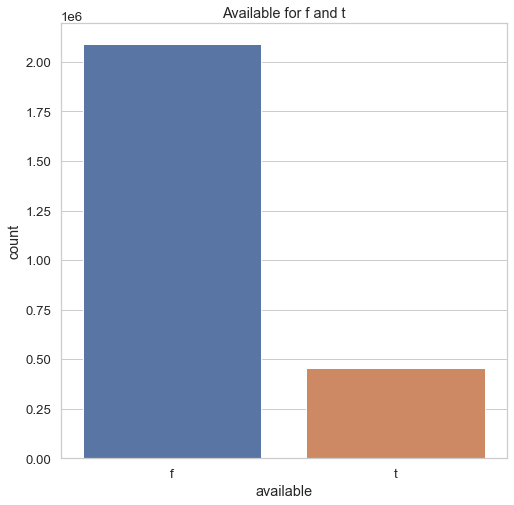

In [115]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (8,8))
sns.countplot('available',data=calendar).set_title('Available for f and t')

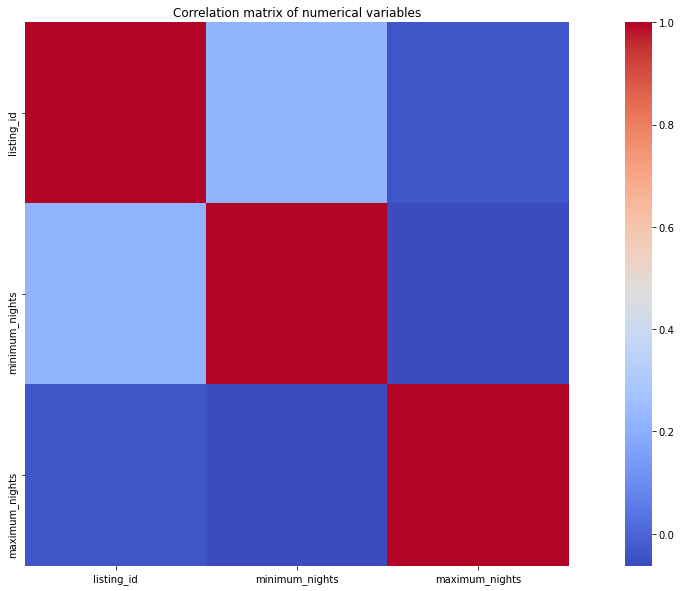

In [23]:
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(calendar.corr(), square=True, cmap='coolwarm')
plt.title(title)
plt.ioff()


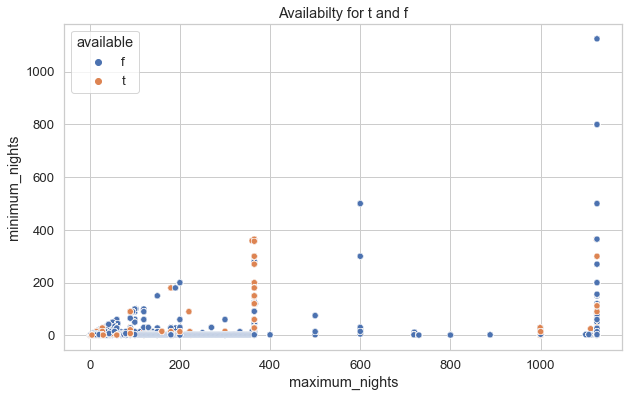

In [117]:
title = 'Availabilty for t and f'
plt.figure(figsize=(10,6))
sns.scatterplot(calendar.maximum_nights,calendar.minimum_nights,hue=calendar.available).set_title(title)
plt.ioff()

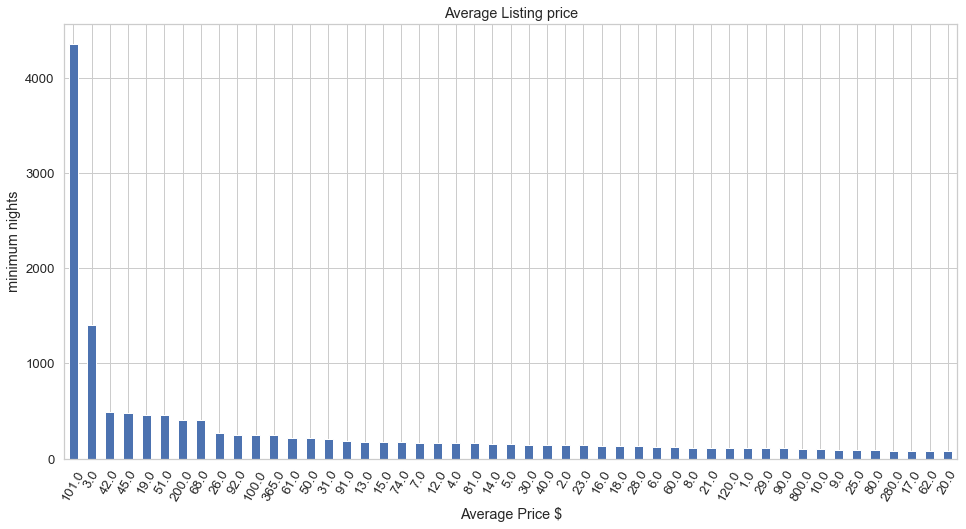

In [128]:
(calendar.groupby('minimum_nights')['price'].mean().sort_values(ascending=False)[:20]).plot(kind="bar", figsize=(16,8));
plt.title("Average Listing price");
plt.xlabel('Average Price $');
plt.ylabel('minimum nights');
plt.xticks(rotation=60);

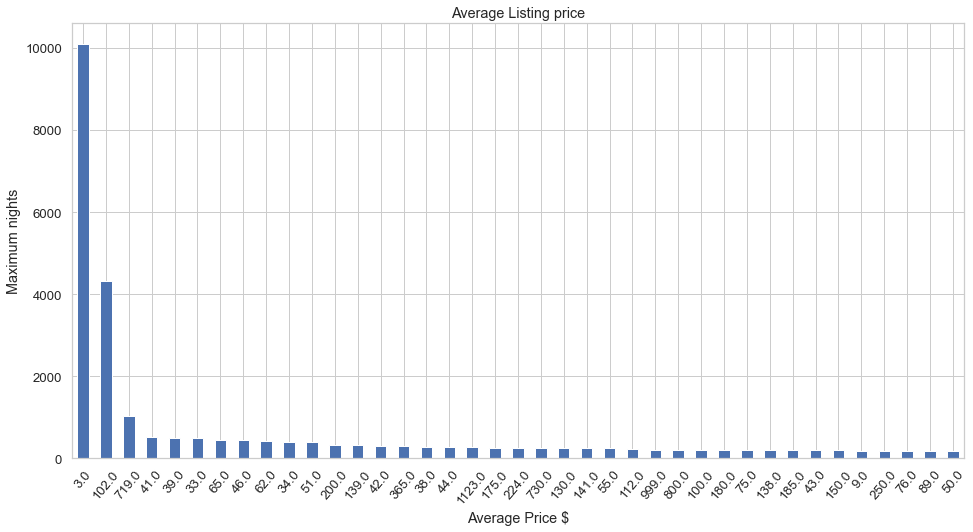

In [132]:
(calendar.groupby('maximum_nights')['price'].mean().sort_values(ascending=False)[:50]).plot(kind="bar", figsize=(16,8));
plt.title("Average Listing price");
plt.xlabel('Average Price $');
plt.ylabel('Maximum nights');
plt.xticks(rotation=50);

# Dataset airbnb_listing EDA

In [9]:
airbnb_listing.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,3493152,https://www.airbnb.com/rooms/3493152,20170304065726,2017-03-05,Private double bed on hill top nr trains and s...,We have a spare double bedroom in our flat in ...,The bedroom is very private (our room is locat...,We have a spare double bedroom in our flat in ...,none,Crystal Palace is a scenic suburb of London wi...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,0.69,"51.42118451930785,-0.0799542878255594","Host Has Profile Pic,Host Identity Verified"
1,41445,https://www.airbnb.com/rooms/41445,20170304065726,2017-03-04,2 Double bed apartment in quiet area North London,The apartment is on the ground floor (no stair...,Stylish apartment with a lot of character furn...,The apartment is on the ground floor (no stair...,none,Quite area popular with families,...,9.0,9.0,8.0,NaN,NaN,strict,1.0,0.20,"51.61648002441267,-0.25787617664571394","Host Has Profile Pic,Host Identity Verified"
2,686205,https://www.airbnb.com/rooms/686205,20170304065726,2017-03-05,Secret Charlton Greenwich Borough Mews CoachHouse,An 1820s Mews with a contemporary interior & t...,"Are you ready to Step back in time, to when hi...",An 1820s Mews with a contemporary interior & t...,business,"Historical, easy to access the city, lots of o...",...,10.0,9.0,10.0,NaN,NaN,flexible,1.0,0.18,"51.4853801203812,0.03237223028393566","Host Has Profile Pic,Host Identity Verified,Is..."
3,13108139,https://www.airbnb.com/rooms/13108139,20170304065726,2017-03-04,Beautiful room in central London,The apartment is in a lovely tree lined street...,This is a private bedroom within an apartment....,The apartment is in a lovely tree lined street...,none,This is a perfect room for easy travelling. Th...,...,10.0,10.0,10.0,NaN,NaN,moderate,3.0,5.49,"51.489535144910604,-0.19548113484788876","Host Has Profile Pic,Host Identity Verified"
4,3621702,https://www.airbnb.com/rooms/3621702,20170304065726,2017-03-05,2 mins Baker St tube & Regent's Pk,The room is on the 2nd floor of a beautiful Ge...,"The room contains a king-size bed, a large war...",The room is on the 2nd floor of a beautiful Ge...,none,We've lived here for 22 years and love the con...,...,10.0,10.0,10.0,NaN,NaN,flexible,2.0,1.10,"51.52342720623529,-0.15851680515925295","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [10]:
airbnb_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8151 entries, 0 to 8150
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              8151 non-null   int64  
 1   Listing Url                     8151 non-null   object 
 2   Scrape ID                       8151 non-null   int64  
 3   Last Scraped                    8151 non-null   object 
 4   Name                            8149 non-null   object 
 5   Summary                         8019 non-null   object 
 6   Space                           5396 non-null   object 
 7   Description                     8150 non-null   object 
 8   Experiences Offered             8151 non-null   object 
 9   Neighborhood Overview           4794 non-null   object 
 10  Notes                           3389 non-null   object 
 11  Transit                         5015 non-null   object 
 12  Access                          49

In [11]:
airbnb_listing.isnull().sum()

ID                                   0
Listing Url                          0
Scrape ID                            0
Last Scraped                         0
Name                                 2
                                  ... 
Cancellation Policy                  0
Calculated host listings count       1
Reviews per Month                 1656
Geolocation                          0
Features                            10
Length: 89, dtype: int64